<a href="https://colab.research.google.com/github/namozhdehi/Pneumonia-/blob/main/04_Pre_Processing_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4 Pre-Processing<a id='4_PreProcessing'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 PreProcessing](#4_PreProcessing)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Data Loading and Setup](#4.4_Data_Loading)
  * [4.5 Image Transformations](#4.5_Transformations)
  * [4.6 Data Augmentation](#4.6_Augmentation)
  * [4.7 Train/Validation/Test Splitting](#4.7_Splitting)
  * [4.8 DataLoader Creation](#4.8_DataLoader)
  * [4.9 Removing Duplicates](#4.9_Remove_Duplicates)
  * [4.10 Display Sample Batch](#4.10_Batch)
  * [4.11 Save Processed Data](#4.11_Save)

## 4.2 Introduction<a id='4.2_Introduction'></a>

In this notebook, we will preprocess the chest X-ray dataset for pneumonia detection using PyTorch. This involves loading the images, applying image transformations, splitting the dataset into training, validation, and test sets, and finally creating `DataLoader` objects to feed the images into the model during training. These preprocessing steps are crucial for training a deep learning model efficiently and ensuring that the data is ready for input.


## 4.3 Imports<a id='4.3_Imports'></a>

In [2]:
import os
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, UnidentifiedImageError

## 4.4 Data Loading and Setup<a id='4.4_Data_Loading'></a>

First, we will load the dataset from the previously saved CSV files (after the EDA phase).

In [3]:
# Directory where the images are stored
data_dir = 'Data/chest_xray'

# Load CSV files from the EDA step
train_df = pd.read_csv('pneumonia_EDA_train.csv')
val_df = pd.read_csv('pneumonia_EDA_val.csv')
test_df = pd.read_csv('pneumonia_EDA_test.csv')

# Print the size of datasets
print(f"Training Set: {train_df.shape}")
print(f"Validation Set: {val_df.shape}")
print(f"Test Set: {test_df.shape}")

Training Set: (4172, 3)
Validation Set: (1044, 3)
Test Set: (624, 3)


## 4.4.1 Setup Kaggle API<a id='2.5_Kaggle'></a>

This code sets up the Kaggle API credentials to download the "chest-xray-pneumonia" dataset from Kaggle, unzips the dataset into a folder named "Data/chest_xray," and checks if the directory exists, raising an error if it doesn't.

In [4]:
# Set up Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/kaggle.json"  # Update this path

# Download the dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# Unzip the downloaded file
import zipfile

with zipfile.ZipFile('chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('Data')  # Extract to a folder named 'chest_xray'

# Define the data directory where the dataset is extracted
data_dir = 'Data/chest_xray'


# Check if data_dir exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The dataset directory '{data_dir}' does not exist. Please check the path.")

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


## 4.5 Image Transformations<a id='4.5_Transformations'></a>

Define the transformations we will apply to the images. This includes resizing, normalizing, and converting the images to tensors.

In [5]:
# Define transformations for train, validation, and test sets
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])  # Normalize

## 4.6 Data Augmentation<a id='4.6_Augmentation'></a>

For the training dataset, we will apply data augmentation techniques to artificially increase the size of the dataset and improve the model's ability to generalize.

In [6]:
# Define data augmentation for training set
augmentations = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  # Apply horizontal flip for data augmentation
    transforms.RandomRotation(15),      # Random rotation
    transforms.ColorJitter(),           # Change brightness, contrast, etc.
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## 4.7 Train/Validation/Test Splitting<a id='4.7_Splitting'></a>

Since the data is already divided into train, validation, and test sets, we will create PyTorch datasets using ImageFolder.

In [7]:
# Load the datasets using ImageFolder
train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=augmentations)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=test_transforms)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=test_transforms)

# Check class distribution
print(f"Training Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

Training Dataset Size: 5216
Validation Dataset Size: 16
Test Dataset Size: 624


## 4.8 DataLoader Creation<a id='4.8_DataLoader'></a>

Create DataLoader objects to efficiently load batches of data during training.

In [8]:
# Define batch size
batch_size = 32

# Create DataLoaders for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print DataLoader information
print(f"Training DataLoader batches: {len(train_loader)}")
print(f"Validation DataLoader batches: {len(val_loader)}")
print(f"Test DataLoader batches: {len(test_loader)}")

Training DataLoader batches: 163
Validation DataLoader batches: 1
Test DataLoader batches: 20


## 4.9 Removing Duplicates<a id='4.9_Remove_Duplicates'></a>

Since duplicate images can skew model training, let's remove any duplicate images found based on the file content.

In [9]:
# Function to remove duplicate images based on image file content
def remove_duplicates(df):
    image_hashes = {}
    duplicates = []

    for img_path in df['image_path']:
        try:
            with Image.open(img_path) as img:
                img_hash = hash(img.tobytes())  # Hash the image content
                if img_hash in image_hashes:
                    duplicates.append(img_path)  # Save duplicate paths
                else:
                    image_hashes[img_hash] = img_path
        except FileNotFoundError:
            print(f"File not found: {img_path}")
        except UnidentifiedImageError:
            print(f"Corrupted image found: {img_path}")

    # Drop duplicates from the DataFrame
    df = df[~df['image_path'].isin(duplicates)]
    print(f"Removed {len(duplicates)} duplicates.")
    return df

# Remove duplicates from train, val, and test sets
train_df = remove_duplicates(train_df)
val_df = remove_duplicates(val_df)
test_df = remove_duplicates(test_df)

Removed 16 duplicates.
Removed 1 duplicates.
Removed 6 duplicates.


## 4.10 Display Sample Batch<a id='4.10_Batch'></a>

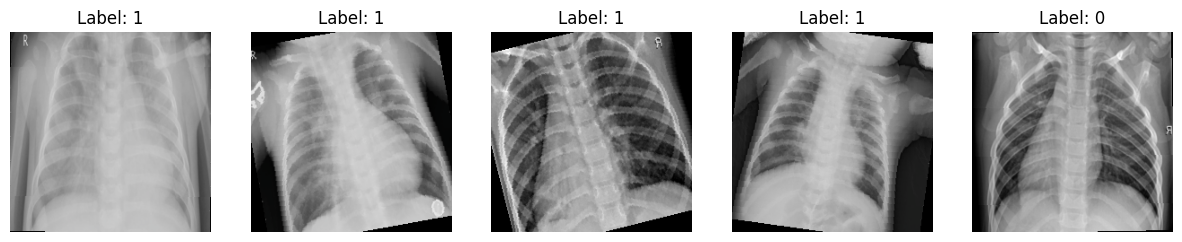

In [10]:
# Display a batch of images to verify the DataLoader
def show_images(loader):
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))
    for i in range(5):
        img = np.transpose(images[i].numpy(), (1, 2, 0))
        img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Un-normalize
        img = np.clip(img, 0, 1)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Label: {labels[i].item()}')
    plt.show()

# Show a batch of training images
show_images(train_loader)

The image shows five chest X-ray samples from the dataset, with labels indicating their classifications: "1" for Pneumonia and "0" for Normal. Four of the X-rays are labeled as Pneumonia, and one is labeled as Normal. The images show a variety of lung conditions, with the Pneumonia-labeled X-rays typically exhibiting cloudier or more opaque regions in the lungs, which may indicate infection, while the Normal X-ray displays clearer lung structures. This visualization helps to better understand the dataset and provides insight into the features the model will learn to distinguish between pneumonia and normal cases.

## 4.11 Save Processed Data<a id='4.11_Save'></a>

Finally, save the preprocessed dataset to CSV files for future steps or model training.

In [12]:
# Save the DataLoader information or other relevant data if needed for later phases
torch.save(train_loader, 'PreProcessingtrain_loader.pth')
torch.save(val_loader, 'PreProcessingtrain_val_loader.pth')
torch.save(test_loader, 'PreProcessingtrain_test_loader.pth')

print("DataLoaders saved successfully!")

DataLoaders saved successfully!


## 4.11 Summary<a id='4.10_Summary'></a>

In this notebook, we preprocessed the chest X-ray dataset for pneumonia detection using PyTorch. We loaded the data, applied transformations such as resizing, normalization, and data augmentation to enhance model generalization. We also removed duplicate images to avoid skewing the training process. After splitting the data into training, validation, and test sets, we created DataLoader objects to efficiently feed batches during model training. Finally, we saved the preprocessed DataLoaders for future use. This ensures the data is clean and ready for model training.